
<img src=https://static.casadomo.com/media/2020/02/lonmark-espana-universidad-valencia-jornada-automatizacion.png width="300">


# Aprendizaje máquina II: t-SNE

Yolanda Vives Gilabert

Este notebook demuestra el funcionamiento básico de la librerías openTSNE y sklearn.TSNE:

https://opentsne.readthedocs.io/en/latest/examples/01_simple_usage/01_simple_usage.html
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

Descargarse el fichero utils de https://github.com/pavlin-policar/openTSNE/blob/master/examples/utils.py

In [1]:
from openTSNE import TSNE
from resources import utils
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

#### Cargar datos

En este ejemplo se utiliza el dataset Macosko 2015, que son datos de retina de ratón. Se trata de un dataset bastante conocido y bastante explorado en la literatura. Se puede obtener en el siguiente enlace: http://file.biolab.si/opentsne/macosko_2015.pkl.gz

In [2]:
import gzip
import pickle

with gzip.open("data/macosko_2015.pkl.gz", "rb") as f:
    data = pickle.load(f)

x = data["pca_50"]
y = data["CellType1"].astype(str)

print("Data set contains %d samples with %d features" % x.shape)

Data set contains 44808 samples with 50 features


#### Crear train/test split

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)

print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])

30021 training samples
14787 test samples


#### Run t-SNE
Primero se creará un embedding de los datos. En el siguiente enlace encontrarás los parámetros de entrada de la función tsne.

https://opentsne.readthedocs.io/en/latest/api/index.html


In [4]:
tsne = TSNE(
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 3.93 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.39 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.13 seconds
===> Running optimization with exaggeration=12.00, lr=2501.75 for 250 iterations...
Iteration   50, KL divergence 5.1602, 50 iterations in 1.5394 sec
Iteration  100, KL divergence 5.0981, 50 iterations in 1.5649 sec
Iteration  150, KL divergence 5.0645, 50 iterations in 1.6701 sec
Iteration  200, KL divergence 5.0500, 50 iterations in 1.4528 sec
Iteration  250, KL divergence 5.0422, 50 iterations in 1.5061 sec
   --> Time elapsed: 7.73 seconds
===> Running optimization with exaggeration=1

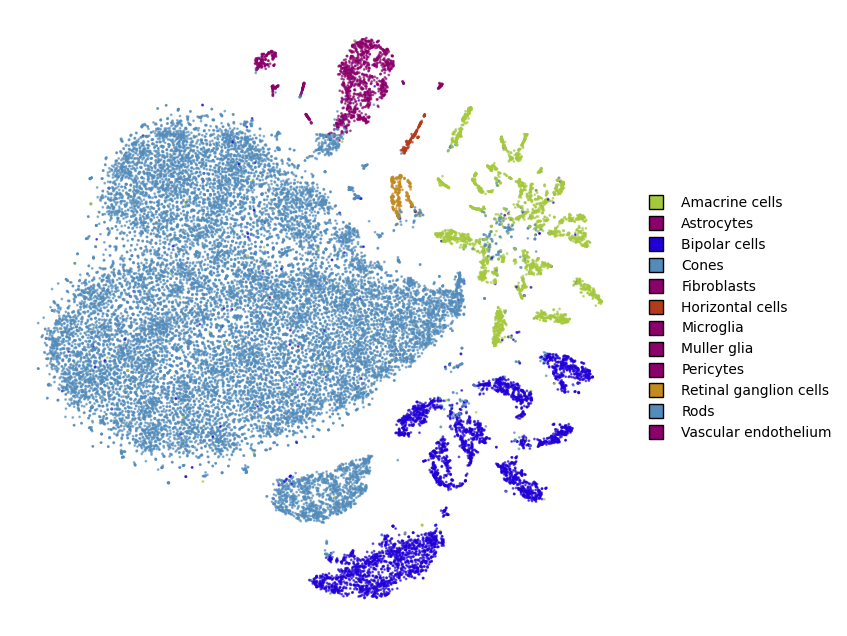

In [5]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS)

#### Transformación

Actualmente openTSNE es la única librería que permite meter en el `embedding` nuevos puntos. 

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 0.93 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.01 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 213886.5777, 50 iterations in 0.2703 sec
Iteration  100, KL divergence 212347.9142, 50 iterations in 0.2759 sec
Iteration  150, KL divergence 211342.3439, 50 iterations in 0.2578 sec
Iteration  200, KL divergence 210614.9459, 50 iterations in 0.2581 sec
Iteration  250, KL divergence 210065.5598, 50 iterations in 0.2438 sec
   --> Time elapsed: 1.31 seconds
CPU times: total: 1.84 s
Wall time: 2.67 s


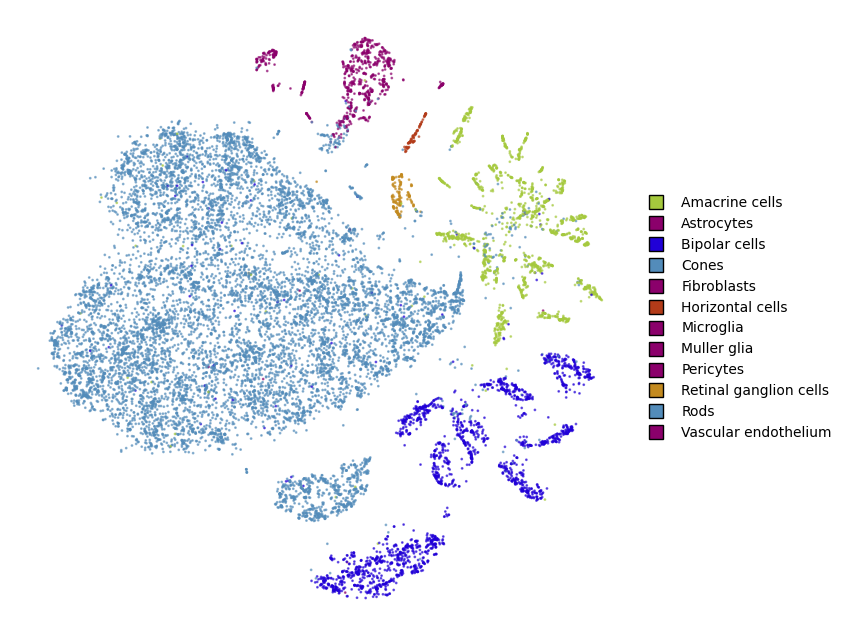

In [6]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS)

#### Todo junto

Superpone los puntos transformados en el `embedding`original. 

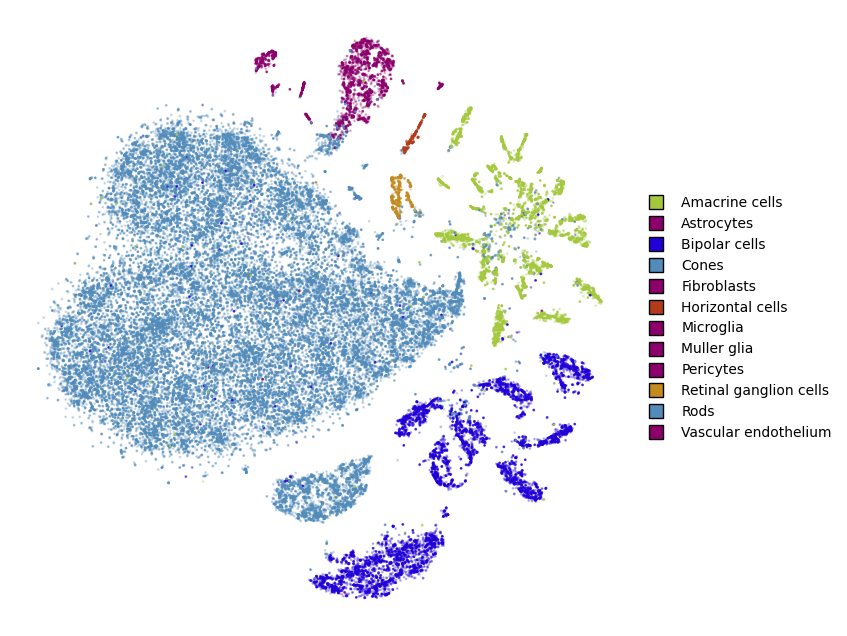

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, colors=utils.MACOSKO_COLORS, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, colors=utils.MACOSKO_COLORS, alpha=0.75, ax=ax)

## Ejercicios con OpenTSNE

Aplica el modelo t-SNE al dataset MNIST. 

#### Load data 
Load MNIST dataset: https://www.kaggle.com/weiouyang/test-dataset/version/1

(60000, 28, 28)
(45000,)


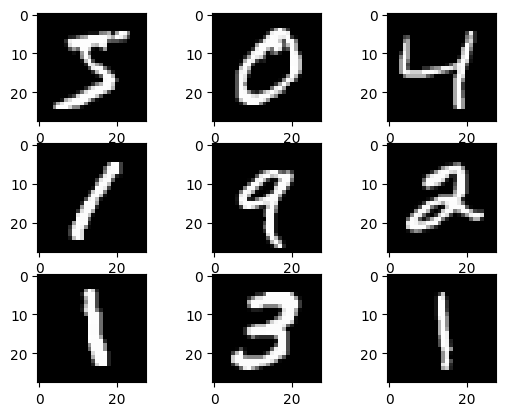

In [26]:
import gzip
import pickle
import sys
import matplotlib.pyplot as plt

f = gzip.open('data/mnist.pkl.gz', 'rb')
if sys.version_info < (3,):
    (X_train, y_train), (X_test, y_test) = pickle.load(f)
else:
    (X_train0, y_train0), (X_test0, y_test0) = pickle.load(f, encoding="bytes")
    
print(X_train0.shape)
print(y_train.shape)

for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train0[i], cmap=plt.get_cmap('gray'))



In [31]:
X_train0 = X_train0.reshape(60000,-1)
y_train0 = y_train0.astype(str)
X_test0 = X_test0.reshape(10000,-1)
y_test0 = y_test0.astype(str)
x_train, x_test, y_train, y_test = train_test_split(X_train0, y_train0, test_size=.25, random_state=42)

#### 1.- Empieza ejecutando la función con los valores por defecto (perplexity = 30, early_exaggeration = 12, initialization='pca')  para un subconjunto de train del 75% de la muestra.

In [10]:
tsne = TSNE(
    perplexity = 30,
    initialization = 'pca',
    early_exaggeration = 12,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 19.49 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.66 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.70 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 5.6614, 50 iterations in 1.9871 sec
Iteration  100, KL divergence 5.5525, 50 iterations in 1.7915 sec
Iteration  150, KL divergence 5.5308, 50 iterations in 1.8736 sec
Iteration  200, KL divergence 5.5215, 50 iterations in 1.8404 sec
Iteration  250, KL divergence 5.5154, 50 iterations in 1.8494 sec
   --> Time elapsed: 9.34 seconds
===> Running optimization with exaggeration=

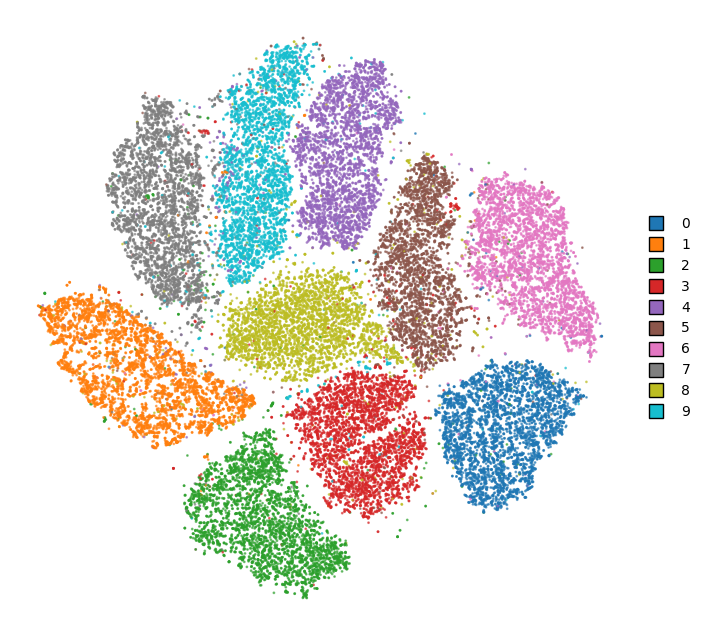

In [15]:
%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train)

===> Finding 15 nearest neighbors in existing embedding using Annoy approximate search...
   --> Time elapsed: 2.22 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.03 seconds
===> Running optimization with exaggeration=4.00, lr=0.10 for 0 iterations...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=1.50, lr=0.10 for 250 iterations...
Iteration   50, KL divergence 216618.3529, 50 iterations in 0.3317 sec
Iteration  100, KL divergence 214883.9981, 50 iterations in 0.3154 sec
Iteration  150, KL divergence 213870.3383, 50 iterations in 0.2999 sec
Iteration  200, KL divergence 213210.6885, 50 iterations in 0.2892 sec
Iteration  250, KL divergence 212725.8341, 50 iterations in 0.2866 sec
   --> Time elapsed: 1.53 seconds
CPU times: total: 3.09 s
Wall time: 5.26 s


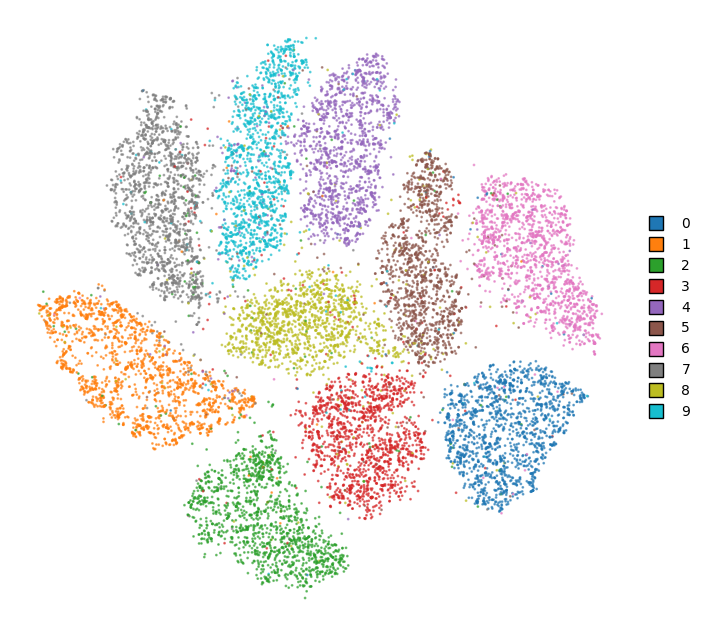

In [19]:
%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test)

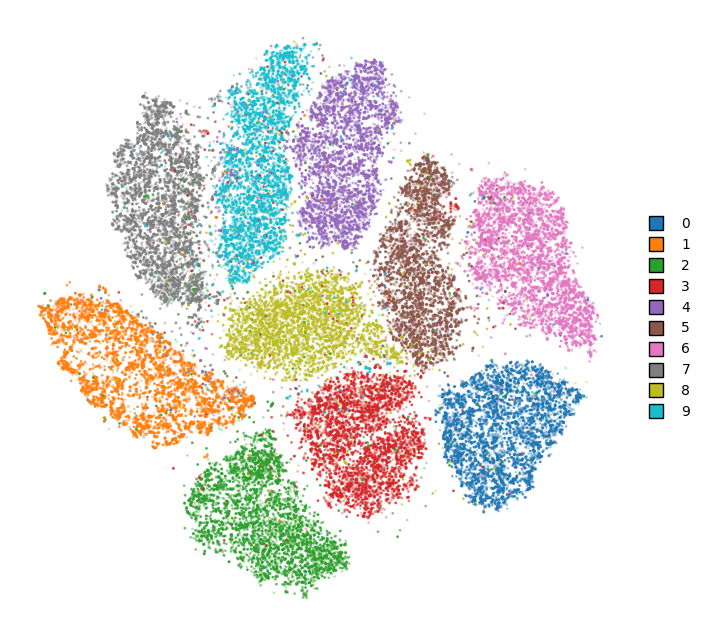

In [21]:
fig, ax = plt.subplots(figsize=(8, 8))
utils.plot(embedding_train, y_train, alpha=0.25, ax=ax)
utils.plot(embedding_test, y_test, alpha=0.75, ax=ax)

#### 2.- Ejecuta el modelo sin early_exaggeration (early_exaggeration=1). ¿Qué diferencias observas y a qué se deben?

--------------------------------------------------------------------------------
TSNE(early_exaggeration=1, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.11 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.57 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.73 seconds
===> Running optimization with exaggeration=1.00, lr=45000.00 for 250 iterations...
Iteration   50, KL divergence 3.4339, 50 iterations in 1.8711 sec
Iteration  100, KL divergence 3.1556, 50 iterations in 2.9469 sec
Iteration  150, KL divergence 3.0148, 50 iterations in 5.0134 sec
Iteration  200, KL divergence 2.9263, 50 iterations in 6.1673 sec
Iteration  250, KL divergence 2.8636, 50 iterations in 7.3057 sec
   --> Time elapsed: 23.31 seconds
===> Running optimization with exaggeration=

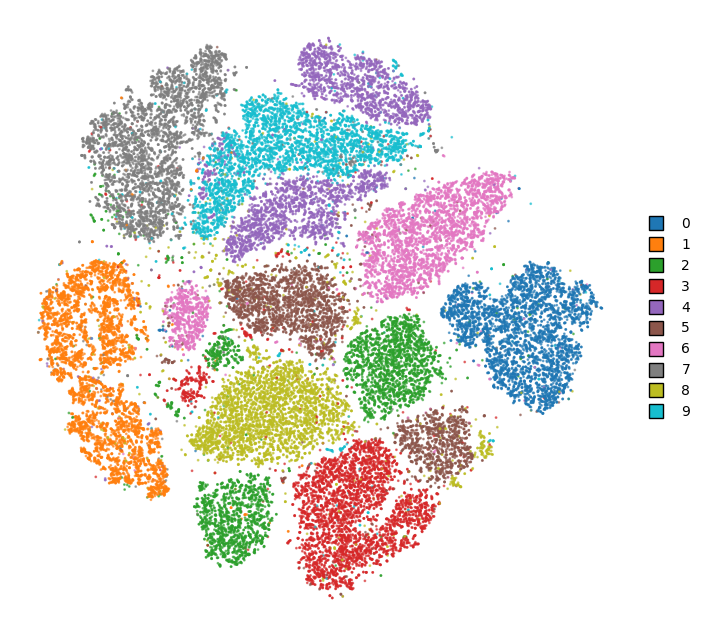

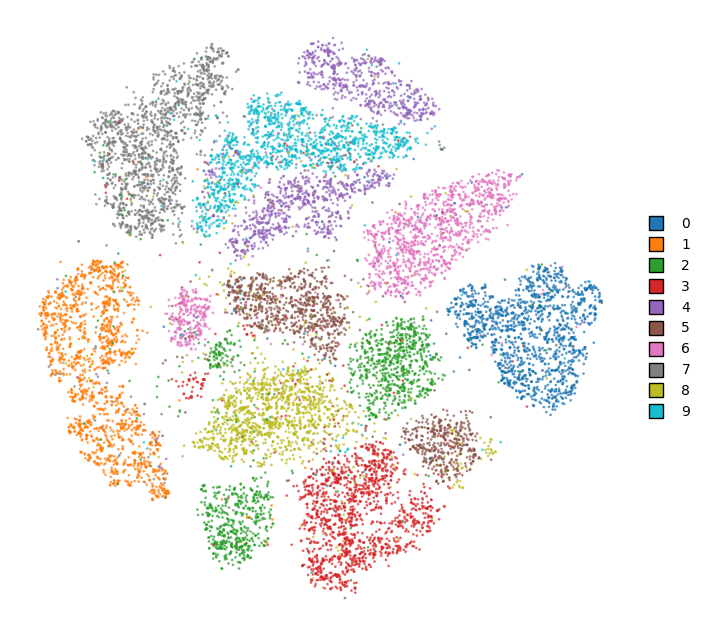

In [23]:
tsne = TSNE(
    perplexity=30,
    initialization = 'pca',
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
    early_exaggeration=1
)

%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train)

%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test)

Al usar `early_exageration = 1`, observamos que algunos de los clusters no se agrupan correctamente, sino que aparecen divididos en varios grupos, como el 2 y el 4. Esto se debe a que este parámetro nos permite exagerar la diferencia entre los grupos previamente a la aplicación del modelo, lo que facilita su distinción.

#### 3.- Ejecuta el modelo con los valores por defecto pero cambiando la inicialización a `random`. ¿Qué ocurre? ¿Obtenemos mejores o peores resultados que en el caso anterior? Compara también los tiempos de ejecución y comenta porqué difieren.

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, initialization='random', n_jobs=8, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 20.84 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.70 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 7.0629, 50 iterations in 2.0031 sec
Iteration  100, KL divergence 5.6295, 50 iterations in 1.8482 sec
Iteration  150, KL divergence 5.5525, 50 iterations in 1.7703 sec
Iteration  200, KL divergence 5.5315, 50 iterations in 1.7299 sec
Iteration  250, KL divergence 5.5248, 50 iterations in 1.6402 sec
   --> Time elapsed: 8.99 seconds
===> Running optimization with exaggeration=1.00, lr=45000.00 for 500 iterations...
Iteration

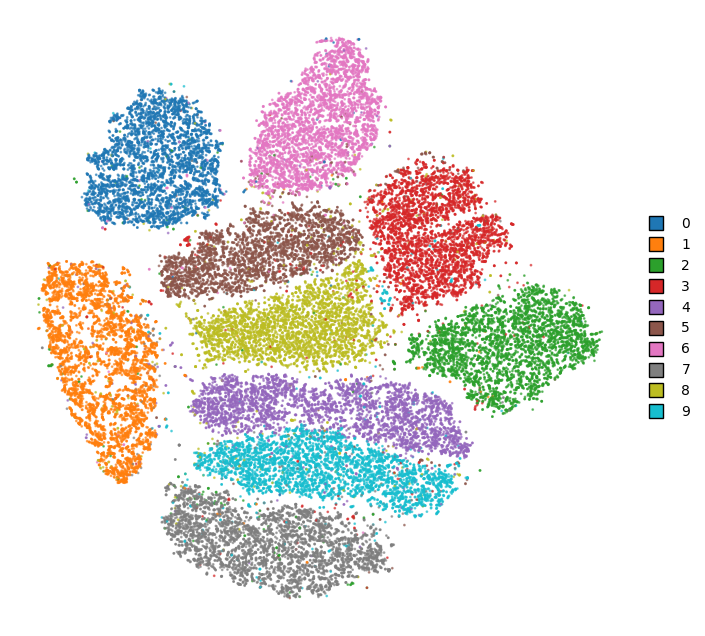

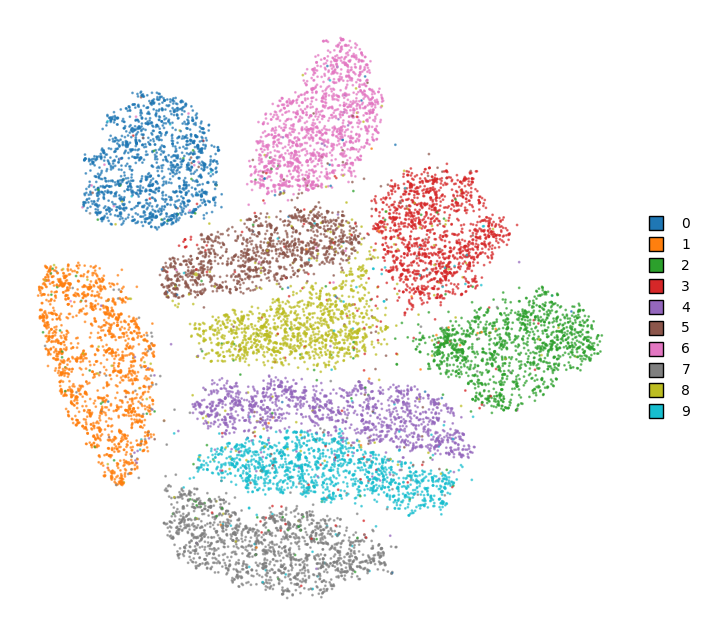

In [24]:
tsne = TSNE(
    perplexity=30,
    initialization = 'random',
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
    early_exaggeration=12
)

%time embedding_train = tsne.fit(x_train)

utils.plot(embedding_train, y_train)

%time embedding_test = embedding_train.transform(x_test)

utils.plot(embedding_test, y_test)

En el apartado 1, con `initialization = 'pca'` el tiempo de ejecución del entrenamiento del modelo ha sido 3min 27s. Ahora, con `initialization = 'pca'`, ha sido de 2min 59s, un tiempo un 14% inferior. Sin embargo, observamos que los grupos están menos diferenciados, siendo la frontera entre algunos de ellos muy pequeña, como entre el 4 y el 9. Esto se debe a que al inicializar el modelo de manera aleatoria, ahorramos coste de computación, pero este converge a una solución peor.

#### 4.- Ejecuta el modelo con 2 valores muy dispares de perplexity, por ejemplo 1 y 100, (y el resto de valores por defecto) y comenta los resultados.

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=1, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 3 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 11.51 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.91 seconds
===> Running optimization with exaggeration=12.00, lr=3750.00 for 250 iterations...
Iteration   50, KL divergence 8.0306, 50 iterations in 1.6842 sec
Iteration  100, KL divergence 7.2541, 50 iterations in 1.6788 sec
Iteration  150, KL divergence 6.8806, 50 iterations in 1.6864 sec
Iteration  200, KL divergence 6.6426, 50 iterations in 1.6330 sec
Iteration  250, KL divergence 6.4704, 50 iterations in 1.5878 sec
   --> Time elapsed: 8.27 seconds
===> Running optimization 

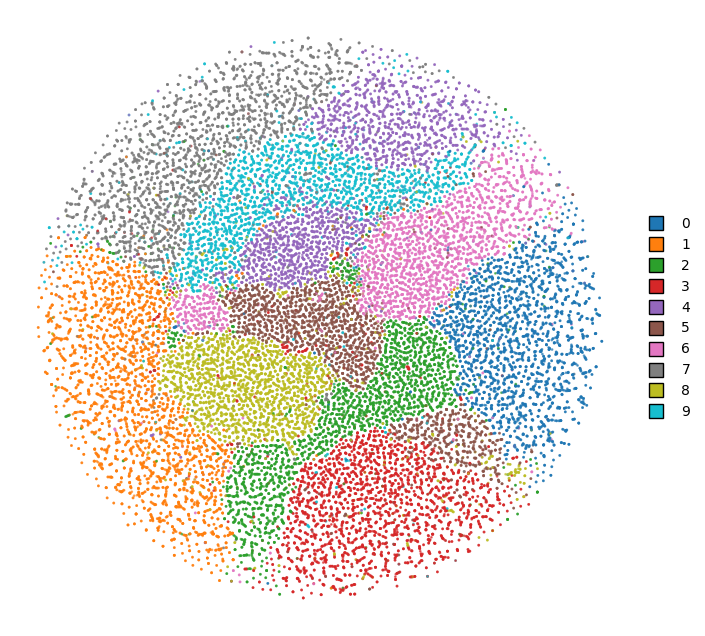

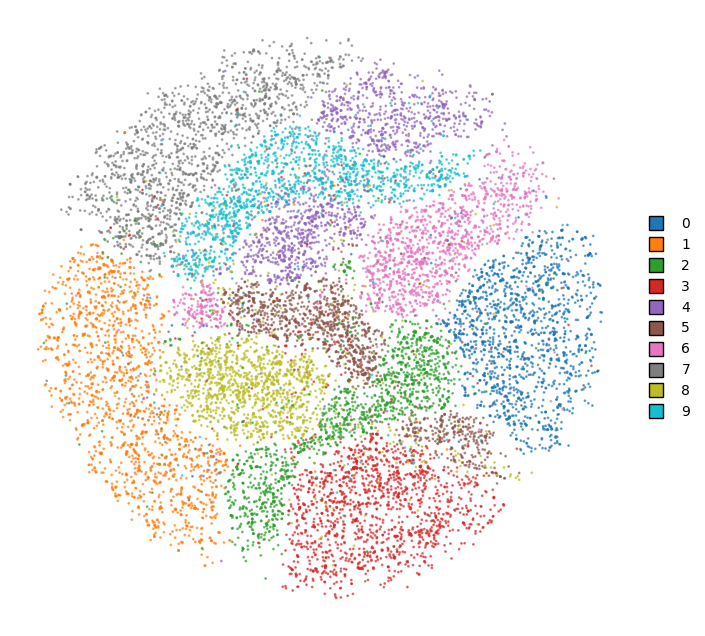

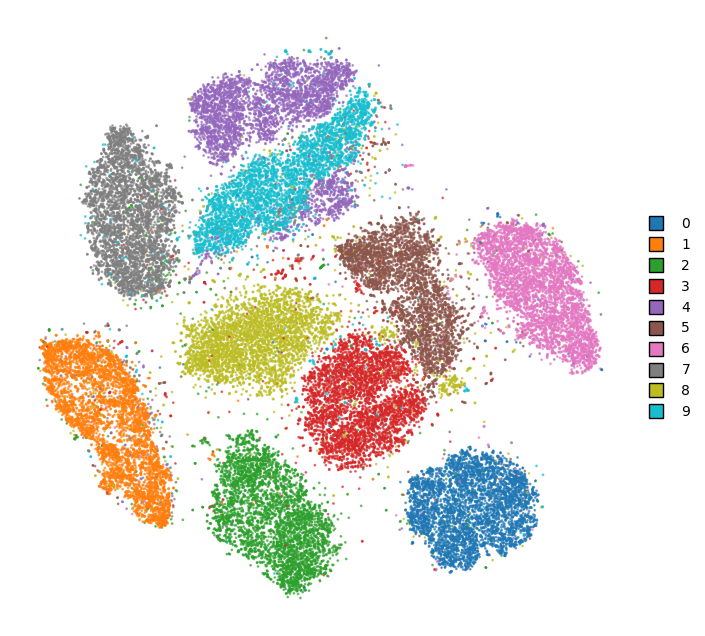

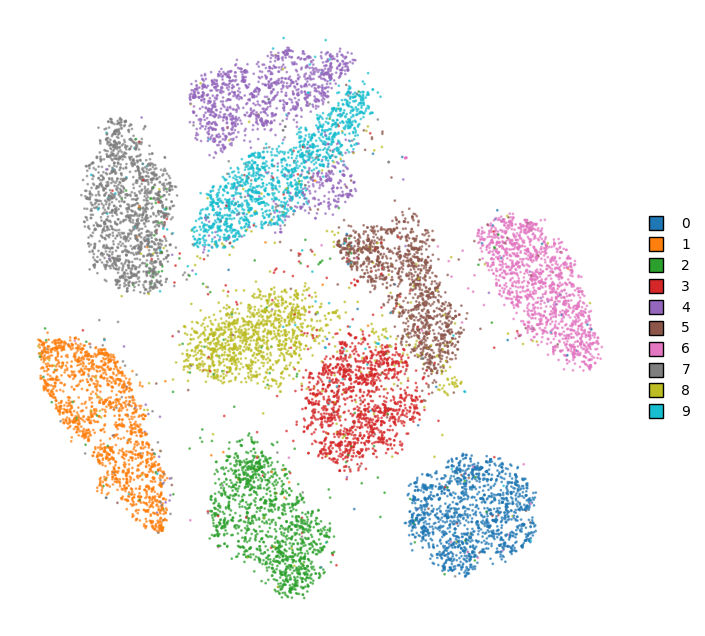

In [25]:
perplexityList = [1, 100]
for perplexityValue in perplexityList:
    tsne = TSNE(
        perplexity=perplexityValue,
        initialization = 'pca',
        metric="euclidean",
        n_jobs=8,
        random_state=42,
        verbose=True,
        early_exaggeration=12
    )

    %time embedding_train = tsne.fit(x_train)

    utils.plot(embedding_train, y_train)

    %time embedding_test = embedding_train.transform(x_test)

    utils.plot(embedding_test, y_test)

Cuando ejecutamos el modelo t-SNE con valores muy dispares de perplexity, como 1 y 100, obtenemos resultados significativamente diferentes debido a cómo afecta la perplexity al proceso de optimización de t-SNE.

- **Perplexity 1:** Con una perplexity tan baja, el modelo no puede capturar adecuadamente la estructura global de los datos. Esto se debe a que la perplexity controla el número de vecinos considerados en el cálculo de las distribuciones condicionales de probabilidad. Con una perplexity de 1, solo se consideran los vecinos más cercanos, lo que da como resultado una representación extremadamente local de los datos. Esto puede conducir a una agrupación deficiente y a una interpretación inadecuada de la estructura de los datos en el espacio de menor dimensión.

- **Perplexity 100:** Por otro lado, con una perplexity tan alta, el modelo puede capturar mejor la estructura global de los datos al considerar más vecinos en el cálculo de las distribuciones condicionales de probabilidad. Sin embargo, esto puede llevar a una simplificación excesiva de la estructura local de los datos, lo que resulta en una representación donde las relaciones locales pueden perderse en favor de la estructura global.

En resumen, al utilizar valores extremos de perplexity como 1 y 100, podemos observar problemas como la incapacidad para capturar la estructura global de los datos o la pérdida de detalles locales, lo que afecta negativamente la interpretación de los resultados de t-SNE. Es importante ajustar la perplexity de manera adecuada para encontrar un equilibrio entre la representación global y local de los datos.

#### 5.- De todas las configuraciones de t-SNE probadas en los ejercicios anteriores, escoge la que mejores resultados obtiene y aplica los datos de test al embedding. Representa el dataset entero.

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 30.20 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 1.02 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 1.24 seconds
===> Running optimization with exaggeration=12.00, lr=5000.00 for 250 iterations...
Iteration   50, KL divergence 5.8828, 50 iterations in 2.4212 sec
Iteration  100, KL divergence 5.7318, 50 iterations in 2.4944 sec
Iteration  150, KL divergence 5.6904, 50 iterations in 2.4459 sec
Iteration  200, KL divergence 5.6753, 50 iterations in 2.3671 sec
Iteration  250, KL divergence 5.6672, 50 iterations in 2.4178 sec
   --> Time elapsed: 12.15 seconds
===> Running optimization with exaggeration

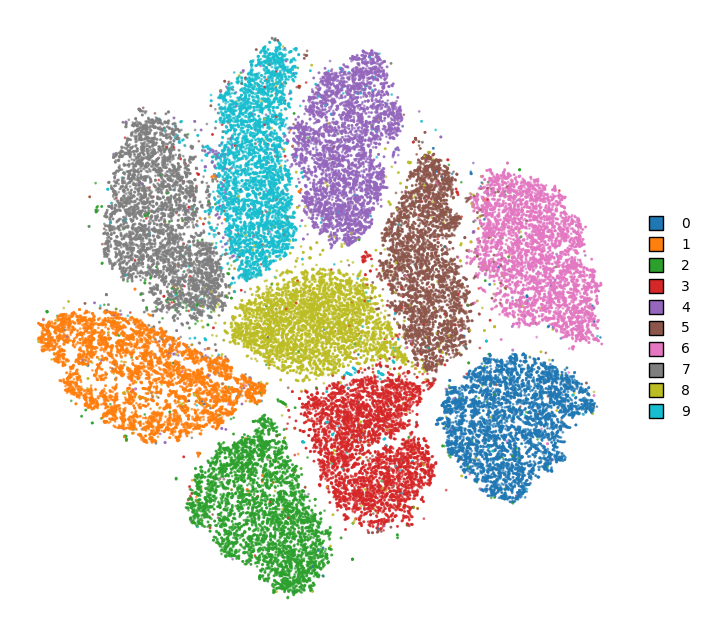

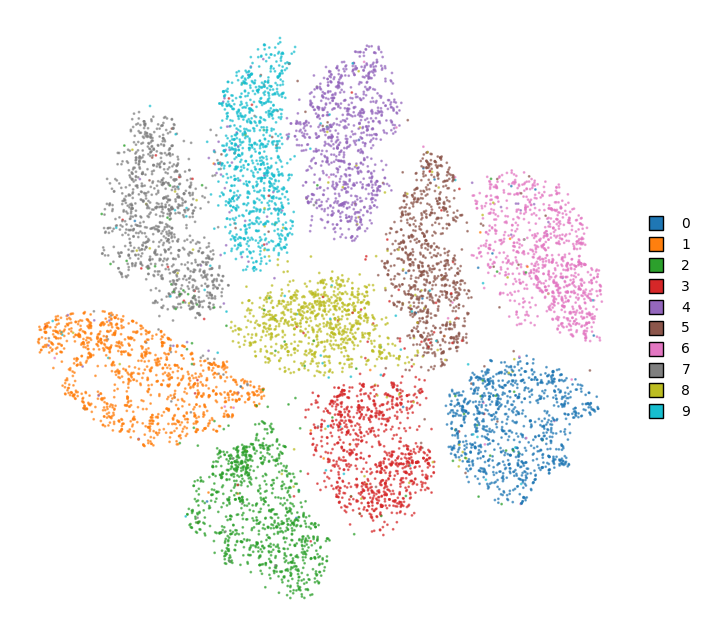

In [32]:
tsne = TSNE(
    perplexity = 30,
    initialization = 'pca',
    early_exaggeration = 12,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True)

%time embedding_train = tsne.fit(X_train0)

utils.plot(embedding_train, y_train0)

%time embedding_test = embedding_train.transform(X_test0)

utils.plot(embedding_test, y_test0)

## Ejercicios con TSNE de sklearn

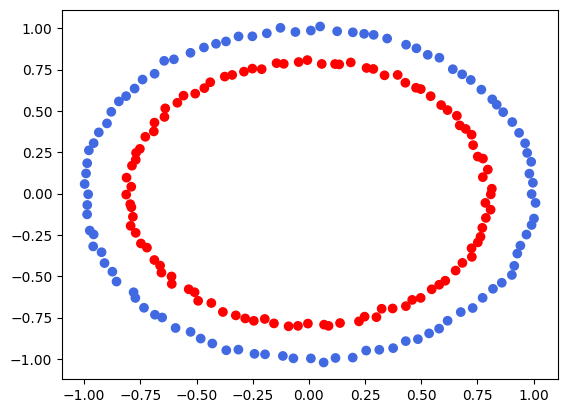

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
colors = ['royalblue','red','deeppink', 'maroon', 'mediumorchid', 'tan', 'forestgreen', 'olive', 'goldenrod', 'lightcyan', 'navy']
vectorizer = np.vectorize(lambda x: colors[x % len(colors)])

from sklearn.datasets import make_circles
X, y = make_circles(n_samples=200, noise=0.01)
plt.scatter(X[:,0], X[:,1],c=vectorizer(y))

#### 1. Ejecuta t-sne de sklearn con el dataset de los círculos variando la perplexity (valores 5, 30, 100).

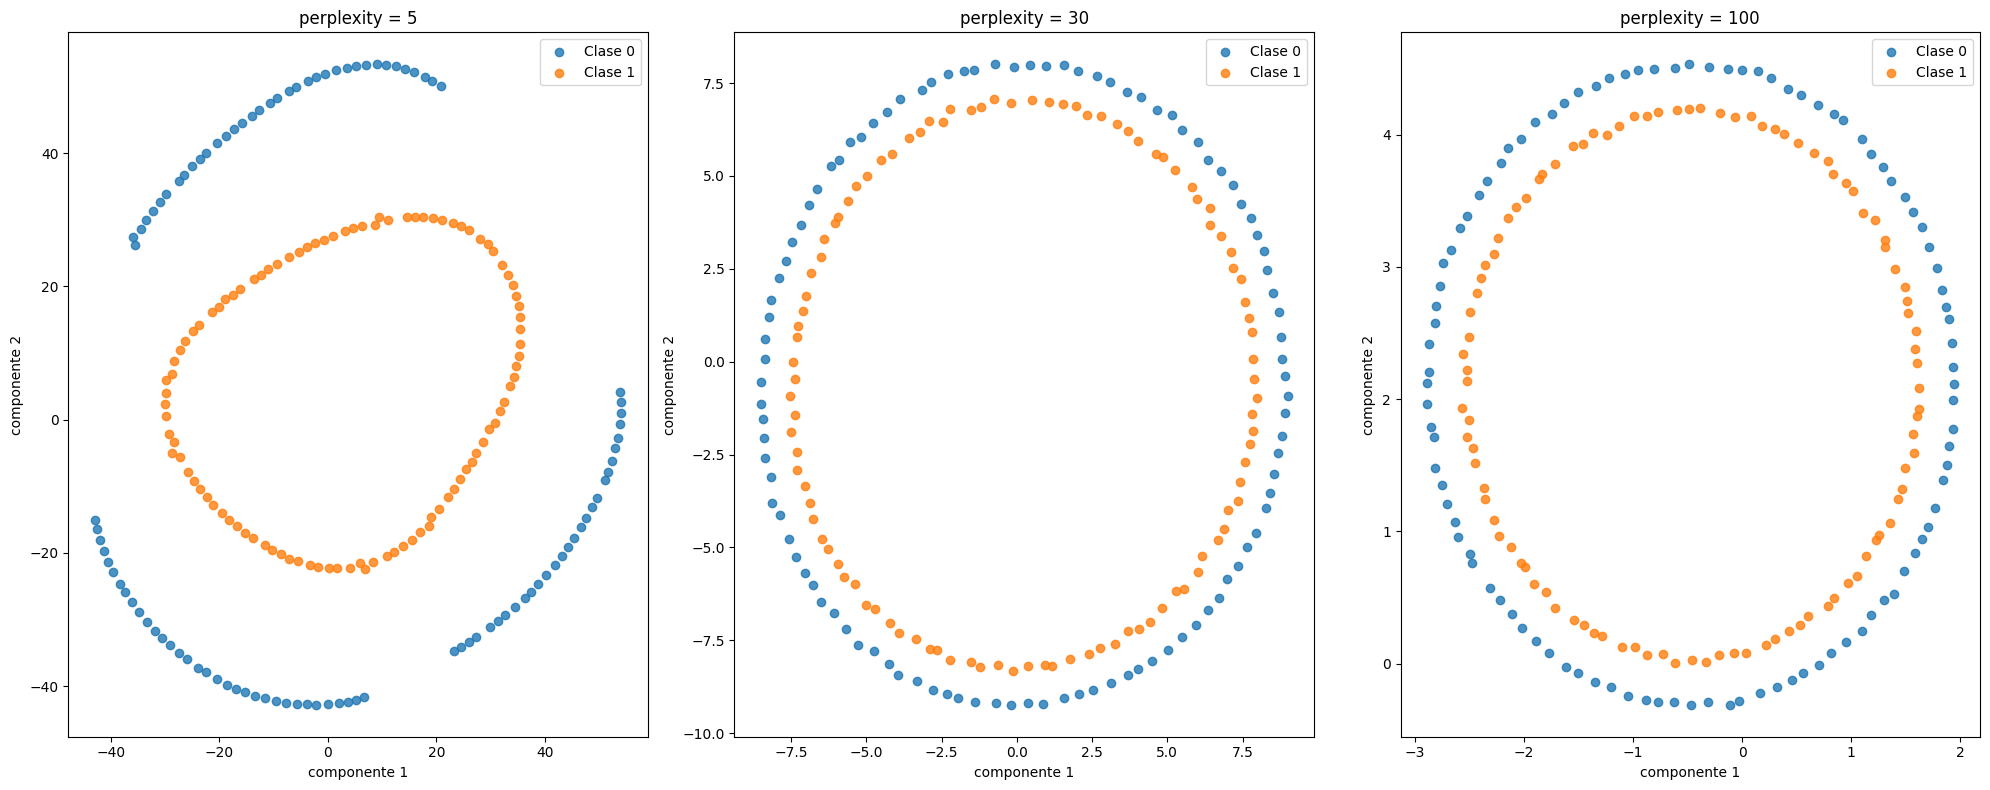

In [37]:
def applyTSne(X, y, perplexityList):

    fig = plt.figure(figsize = (20, 8))
    nPerplexities = len(perplexityList)
    
    klDiv = {}  # Diccionario para almacenar las divergencias KL
    
    for idx, perplexity in enumerate(perplexityList):
        tsne = TSNE(n_components = 2, perplexity = perplexity, random_state = 42)
        y_tsne = tsne.fit_transform(X)
        
        ax = fig.add_subplot(1, nPerplexities, idx + 1)

        uniqueY = np.unique(y)
        for yValue in uniqueY:
            idxArray = np.where(y == yValue)
            ax.scatter(y_tsne[idxArray, 0], y_tsne[idxArray, 1], label = f'Clase {yValue}', alpha = 0.8)
        
        ax.set_title(f"perplexity = {perplexity}")
        ax.set_xlabel("componente 1")
        ax.set_ylabel("componente 2")
        ax.legend()
        
        klDiv[perplexity] = tsne.kl_divergence_
    
    plt.tight_layout()
    plt.show()
    
    return klDiv

perplexityList = [5, 30, 100]
klDiv = applyTSne(X, y, perplexityList)

#### 2. ¿Que KL obtienes en cada caso?

In [40]:
print(klDiv)

{5: 0.32386934757232666, 30: 0.18124929070472717, 100: 0.07123331725597382}


Observamos que al aumentar el `perplexity` obtenemos divergencias de Kullback-Leibler cada vez menores, es decir, que la discrepancia entre la distribución de probabilidad de los datos en el espacio original y en el reducido se reduce al aumentar el número de vecinos.

#### 3. Compara los tiempos de ejecución de Barnes-Hut con el método exacto. Utiliza el valor de perplexity que mejor resultado haya obtenido según el ejercicio anterior.

In [41]:
import time

def applyTSneMethod(X, perplexity, method):
    initTime = time.time()
    tsne = TSNE(n_components = 2, perplexity = perplexity, method = method, random_state = 42)
    y_tsne = tsne.fit_transform(X)
    
    endTime = time.time()
    duration = endTime - initTime
    return y_tsne, duration

perplexity = 100

_, durationExact = applyTSneMethod(X, perplexity, method = 'exact')
print(f"Método exacto: {durationExact} segundos")

_, durationBh = applyTSneMethod(X, perplexity, method = 'barnes_hut')
print(f"Barnes-Hut: {durationBh} segundos")


Método exacto: 0.42087507247924805 segundos
Barnes-Hut: 0.3375740051269531 segundos


Empleando el método de Barnes-Hut, el tiempo de ejecución es inferior. Esto se debe a que en este caso dividimos el espacio en celdas, y únicamente calculamos las similitudes entre esas celdas en vez de punto a punto.